# Projet Intelligence Artificielle

# Besoin client 1 : Visualisation sur carte

## importation

In [20]:
import pandas as pd

data_prof = pd.read_csv('./Données/Data_Arbre.csv')
data_clean = pd.read_csv("./Données/data_clean.csv", encoding='utf-8', sep=";", decimal=",")


## 1.Préparation des Données

In [21]:
from sklearn.preprocessing import StandardScaler
from geopy.point import Point

data = data_prof
    
#colonnes pertinentes
data = data[['latitude', 'longitude', 'haut_tot']]

# Supprimer les lignes avec des valeurs manquantes
data.dropna(inplace=True)
 #renommer les colonnes avec un nom potentiellement diffférent 
data.rename(columns={'lon': 'longitude', 'lat': 'latitude'}, inplace=True)

# Normaliser les données
scaler = StandardScaler()
data[['haut_tot']] = scaler.fit_transform(data[['haut_tot']])

C:\Users\elean\AppData\Local\Temp\ipykernel_31932\361177456.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\elean\AppData\Local\Temp\ipykernel_31932\361177456.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\elean\AppData\Local\Temp\ipykernel_31932\361177456.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 2.Apprentissage Non Supervisé

In [22]:
from sklearn.cluster import KMeans

# Fonction pour appliquer le clustering
def apply_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data['cluster'] = kmeans.fit_predict(data[['haut_tot']])
    return data

# Appliquer le clustering avec le nombre de clusters choisi par l'utilisateur
n_clusters = 2
data = apply_clustering(data, n_clusters)

c:\Users\elean\OneDrive\Documents\GitHub\projet_IA\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\elean\AppData\Local\Temp\ipykernel_31932\2639393406.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 3.Métriques pour l'Apprentissage Non Supervisé 

In [23]:
from sklearn.metrics import silhouette_score

# Évaluer les clusters avec la silouhette
score = silhouette_score(data[['haut_tot']], data['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6183070397058021


## 4. Visualisation sur Carte

In [27]:
import plotly.express as px

# On s'assure que les tailles sont positives
data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives

# Création de la carte interactive avec Plotly Express
fig = px.scatter_mapbox(data, 
                        lat='latitude',    # Colonne contenant les données de latitude
                        lon='longitude',   # Colonne contenant les données de longitude
                        color='cluster',   # Colonne contenant les données de cluster pour la coloration
                        size='size',       # Colonne contenant les données de taille pour les points
                        color_continuous_scale=px.colors.sequential.Pinkyl,  # Palette de couleurs
                        size_max=10,       # Taille maximale des points sur la carte
                        zoom=10,           # Niveau de zoom initial de la carte
                        mapbox_style="open-street-map")  # Style de la carte (OpenStreetMap)

# Affichage de la carte interactive
fig.show()


C:\Users\elean\AppData\Local\Temp\ipykernel_31932\470689180.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 5. préparation du script 

### script clusters + boxplot haut_tot

Silhouette Score: 0.6183070397058021


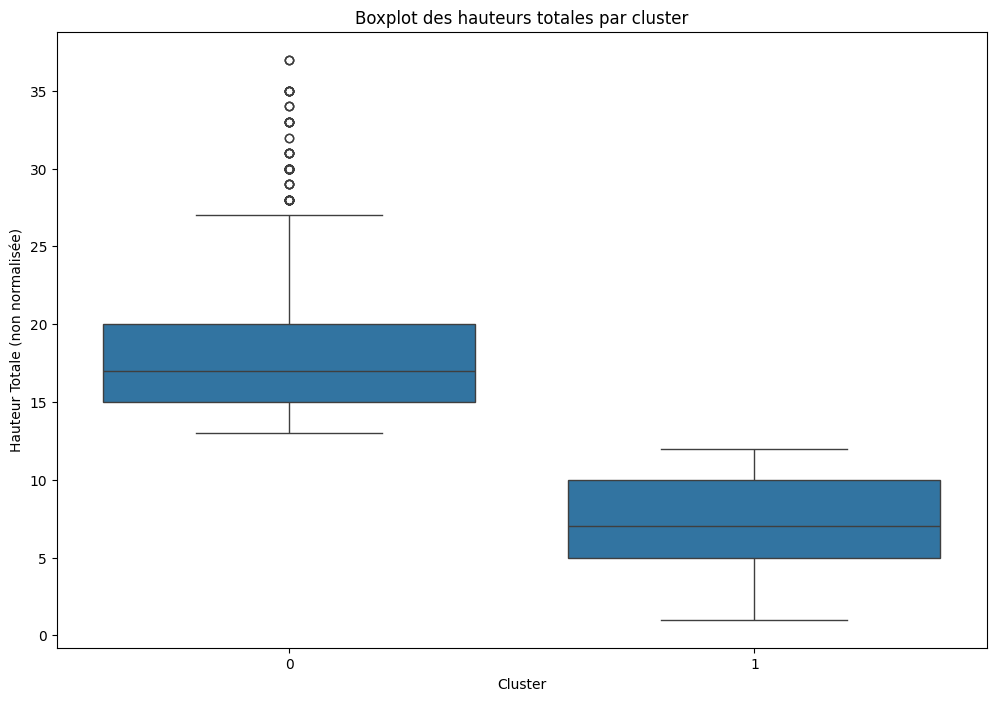

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

def apply_clustering(data, n_clusters):
    # Initialisation du modèle KMeans avec le nombre de clusters spécifié
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    
    # Prédiction des clusters et assignation dans une nouvelle colonne 'cluster'
    data['cluster'] = kmeans.fit_predict(data[['haut_tot']])
    
    return data

def visualize_tree_clusters(file_path, n_clusters):
    # Chargement des données à partir du fichier CSV avec séparateur ","
    data = pd.read_csv(file_path, sep=",")
    
    # Sélection des colonnes pertinentes pour l'analyse : latitude, longitude et hauteur totale
    data = data[['latitude', 'longitude', 'haut_tot']]
    
    # Suppression des lignes avec des valeurs manquantes dans le DataFrame
    data.dropna(inplace=True)
    
    # Normalisation des valeurs de 'haut_tot' à l'aide de StandardScaler pour mettre à l'échelle(mieux pour le clustering)
    scaler = StandardScaler()
    data[['haut_tot']] = scaler.fit_transform(data[['haut_tot']])
    
    # Appliquer le clustering à l'aide de la fonction définie précédemment
    data = apply_clustering(data, n_clusters)
    
    # Calcul du score de silhouette pour évaluer la qualité des clusters obtenus
    score = silhouette_score(data[['haut_tot']], data['cluster'])
    print(f'Silhouette Score: {score}')
    
    # Ajustement des tailles pour l'affichage sur la carte (assurer des tailles positives)
    data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives
    
    # Création de la carte interactive avec Plotly Express
    fig = px.scatter_mapbox(data, 
                            lat='latitude',  # Données de latitude
                            lon='longitude',  # Données de longitude
                            color='cluster',  # Coloration par cluster
                            size='size',  # Taille basée sur la hauteur totale normalisée
                            color_continuous_scale=px.colors.sequential.Plasma,  # Palette de couleurs
                            size_max=10,  # Taille maximale des points sur la carte
                            zoom=10,  # Zoom initial de la carte
                            mapbox_style="open-street-map")  # Style de la carte (OpenStreetMap)
    
    fig.show()  # Affichage de la carte interactive
    
    return data, scaler

def plot_boxplots(data, scaler):
    # Création d'une figure avec une taille spécifique
    plt.figure(figsize=(12, 8))
    
    # Inversion de la normalisation pour retrouver les valeurs originales de 'haut_tot'
    data['haut_tot'] = scaler.inverse_transform(data[['haut_tot']])
    
    # Tracé du boxplot avec seaborn
    sns.boxplot(x='cluster', y='haut_tot', data=data)
    
    # Ajout de titres et labels pour le graphique
    plt.title('Boxplot des hauteurs totales par cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Hauteur Totale (non normalisée)')
    
    plt.show()  # Affichage du boxplot

def main():
    # Demande à l'utilisateur de saisir le nombre de clusters souhaité
    n_clusters = int(input("Entrez le nombre de clusters : "))
    
    file_path = "Données/Data_Arbre.csv"  # Chemin vers le fichier CSV contenant les données
    
    # Appel de la fonction pour visualiser les clusters d'arbres
    data, scaler = visualize_tree_clusters(file_path, n_clusters)

    # Appel de la fonction pour visualiser le boxplot des hauteurs totales par cluster
    plot_boxplots(data, scaler)

if __name__ == "__main__":
    main()


### nombre de clusters à rentrer dans la fonction directement

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

def apply_clustering(data, n_clusters):
    # Initialisation du modèle KMeans avec le nombre de clusters spécifié
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    
    # Prédiction des clusters et assignation dans une nouvelle colonne 'cluster'
    data['cluster'] = kmeans.fit_predict(data[['haut_tot']])
    
    return data

def visualize_tree_clusters(file_path, n_clusters):
    # Chargement des données à partir du fichier CSV avec encodage UTF-8 et délimiteur ";"
    data = pd.read_csv(file_path, encoding='utf-8', sep=";", decimal=",")
    
    # Sélection des colonnes pertinentes pour l'analyse : latitude, longitude et hauteur totale
    data = data[['lat', 'lon', 'haut_tot']]
    
    # Suppression des lignes avec des valeurs manquantes dans le DataFrame
    data.dropna(inplace=True)
    
    # Normalisation des valeurs de 'haut_tot' à l'aide de StandardScaler pour mettre à l'échelle
    scaler = StandardScaler()
    data[['haut_tot']] = scaler.fit_transform(data[['haut_tot']])
    
    # Appliquer le clustering à l'aide de la fonction définie précédemment
    data = apply_clustering(data, n_clusters)
    
    # Calcul du score de silhouette pour évaluer la qualité des clusters obtenus
    score = silhouette_score(data[['haut_tot']], data['cluster'])
    print(f'Silhouette Score: {score}')
    
    # Ajustement des tailles pour l'affichage sur la carte (assurer des tailles positives)
    data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives
    
    # Création de la carte interactive avec Plotly Express
    fig = px.scatter_mapbox(data, 
                            lat='lat',  # Données de latitude
                            lon='lon',  # Données de longitude
                            color='cluster',  # Coloration par cluster
                            size='size',  # Taille basée sur la hauteur totale normalisée
                            color_continuous_scale=px.colors.sequential.Plotly3,  # Palette de couleurs
                            size_max=10,  # Taille maximale des points sur la carte
                            zoom=10,  # Zoom initial de la carte
                            mapbox_style="open-street-map")  # Style de la carte (OpenStreetMap)
    
    # Affichage de la carte interactive
    fig.show()

# Exemple d'utilisation de la fonction pour visualiser les clusters avec 2 clusters
visualize_tree_clusters("Données\data_clean.csv", n_clusters=2)


Silhouette Score: 0.6520279544145563


## Fonctionnalité supplémentaire

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
import plotly.express as px

def apply_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data['cluster'] = kmeans.fit_predict(data[['haut_tot']])
    return data

def detect_anomalies(data):
    #initialiser le modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    
    # on ajuste le modèle sur les données des arbres remarquables uniquement
    remarkable_trees = data[data['remarquable'] == 'Oui']
    isolation_forest.fit(remarkable_trees[['haut_tot', 'longitude', 'latitude']])
    
    #prédire les anomalies pour les arbres remarquables
    data['anomaly'] = 1  #initialiser comme non-anomalies
    data.loc[data['remarquable'] == 'Oui', 'anomaly'] = isolation_forest.predict(remarkable_trees[['haut_tot', 'longitude', 'latitude']])
    # prend les données des arbres remarquables et applique le modèle Isolation Forest pour prédire les anomalies basées sur les caractéristiques spécifiques ('haut_tot', 'longitude', 'latitude'), 
    # et met à jour la colonne 'anomaly' dans le DataFrame principal data avec ces prédictions d'anomalies.
    data['anomaly'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})# on convertit les résultats (-1 pour les anomalies, 1 pour les points normaux)
    
    return data

def visualize_tree_clusters(file_path, n_clusters):
    # Chargement des données à partir du fichier CSV
    data = pd.read_csv(file_path, sep=",")
    
    # Sélection des colonnes pertinentes : latitude, longitude, hauteur totale et remarquable
    data = data[['latitude', 'longitude', 'haut_tot', 'remarquable']]
    
    # Suppression des lignes avec des valeurs manquantes
    data.dropna(inplace=True)
    
    # Normalisation de la colonne 'haut_tot' à l'aide de StandardScaler
    scaler = StandardScaler()
    data[['haut_tot']] = scaler.fit_transform(data[['haut_tot']])
    
    # Appliquer le clustering en utilisant la fonction définie précédemment
    data = apply_clustering(data, n_clusters)
    
    # Détecter les anomalies avec Isolation Forest
    data = detect_anomalies(data)
    
    # Évaluation des clusters à l'aide du score de silhouette
    score = silhouette_score(data[['haut_tot']], data['cluster'])
    print(f'Silhouette Score: {score}')
    
    # Ajuster les tailles pour l'affichage sur la carte
    data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives
    
    # Création de la figure interactive avec Plotly Express
    fig = px.scatter_mapbox(data, 
                            lat='latitude', 
                            lon='longitude', 
                            color='anomaly',  # Coloration par les anomalies détectées
                            size='size',  # Taille basée sur la hauteur totale normalisée
                            hover_data=['cluster'],  # Informations supplémentaires au survol
                            color_discrete_map={'Normal': 'blue', 'Anomaly': 'red'},  # Couleurs des points
                            size_max=10,  # Taille maximale des points sur la carte
                            zoom=10,  # Zoom initial de la carte
                            mapbox_style="open-street-map")  # Style de la carte (OpenStreetMap)
    
    fig.show()
def main():
    # Demander à l'utilisateur le nombre de clusters
    n_clusters = int(input("Entrez le nombre de clusters : "))

    file_path = "Données/Data_Arbre.csv"

    visualize_tree_clusters(file_path, n_clusters)

if __name__ == "__main__":
    main()


Silhouette Score: 0.6183070397058021


## Tests autres variables +matrice corrélation

### Matrice de corrélation

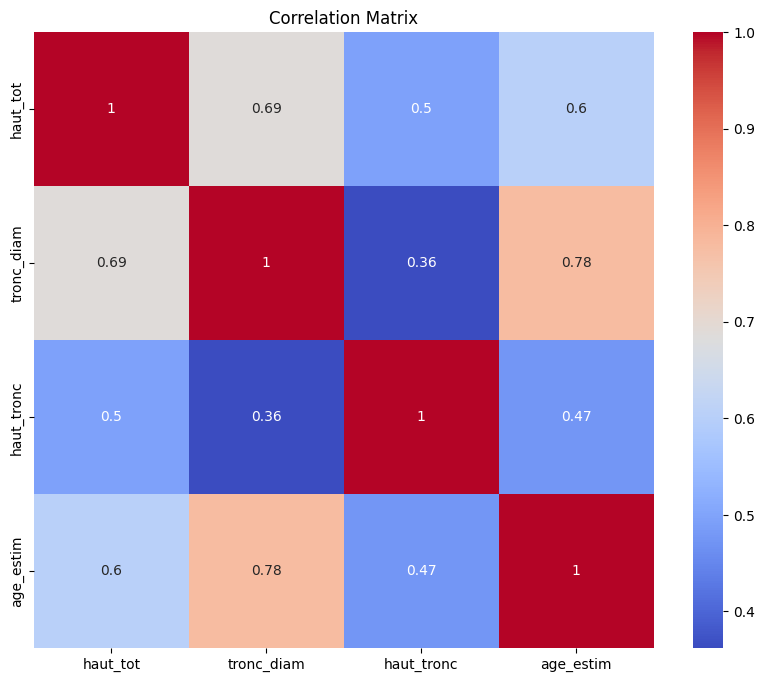

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

data = pd.read_csv("Données/Data_Arbre.csv", sep=",")
plot_correlation_matrix(data[['haut_tot', 'tronc_diam', 'haut_tronc', 'age_estim']])



### Avec haut tronc

Silhouette Score: 0.3625006307470408


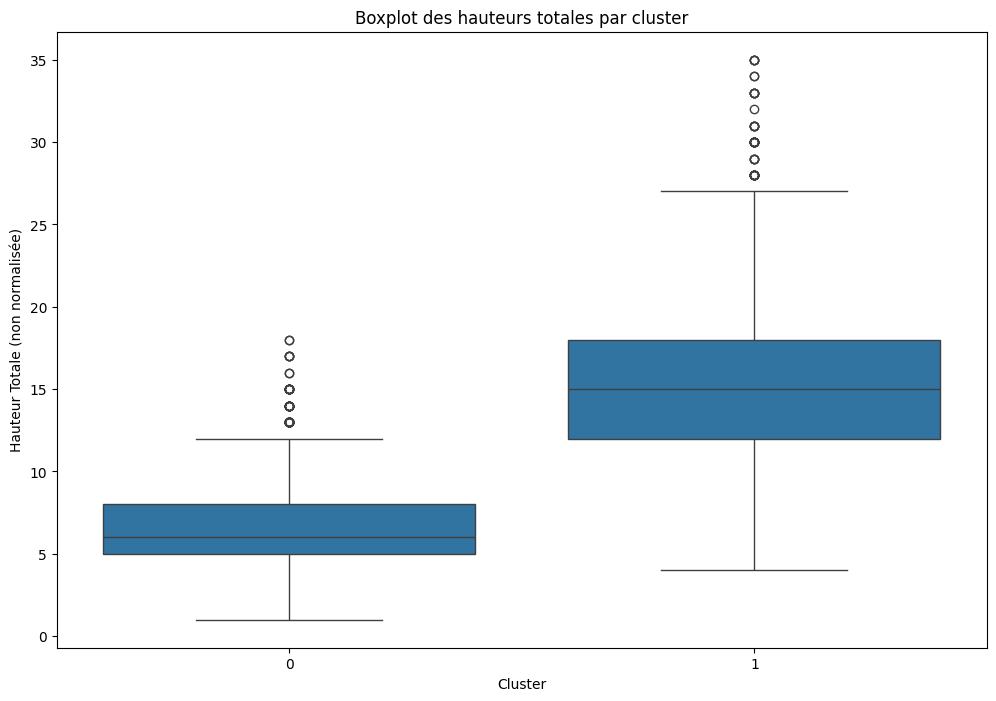

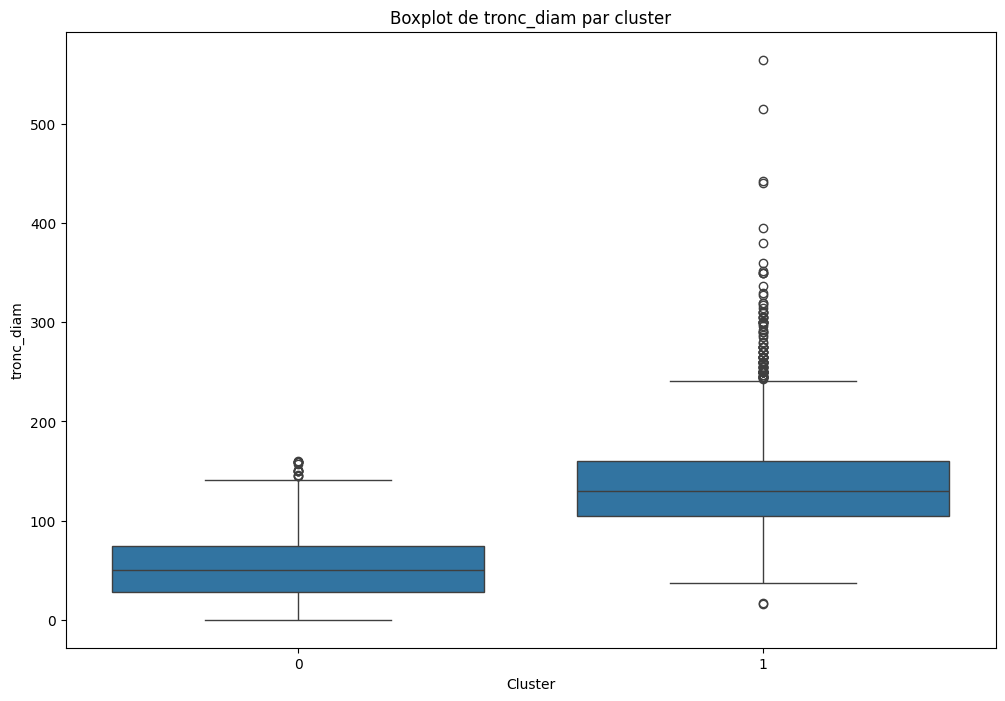

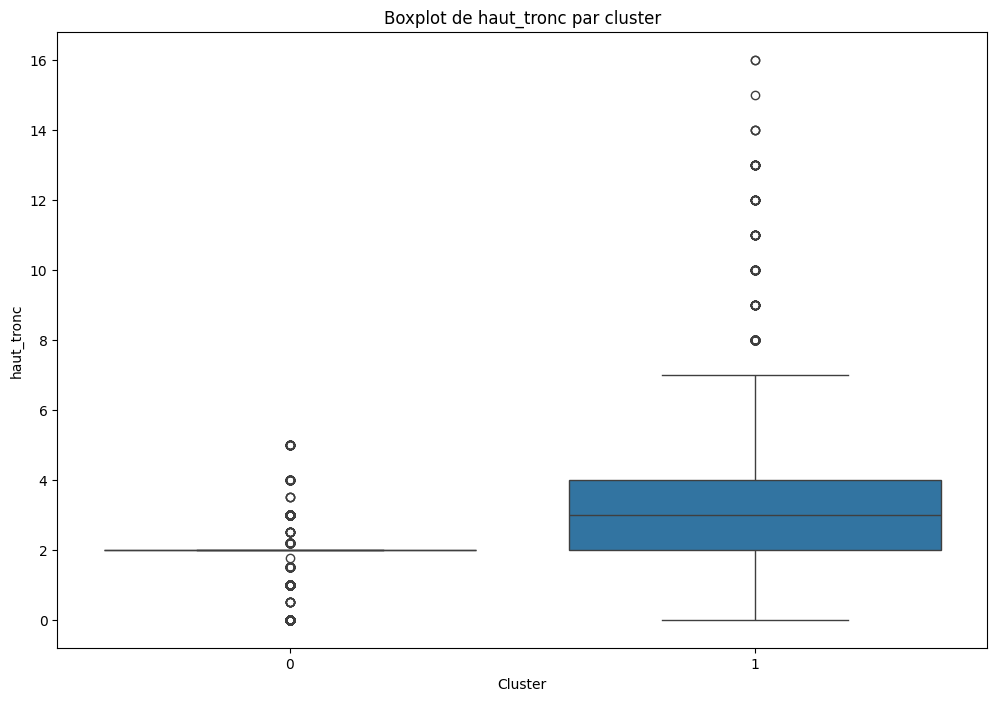

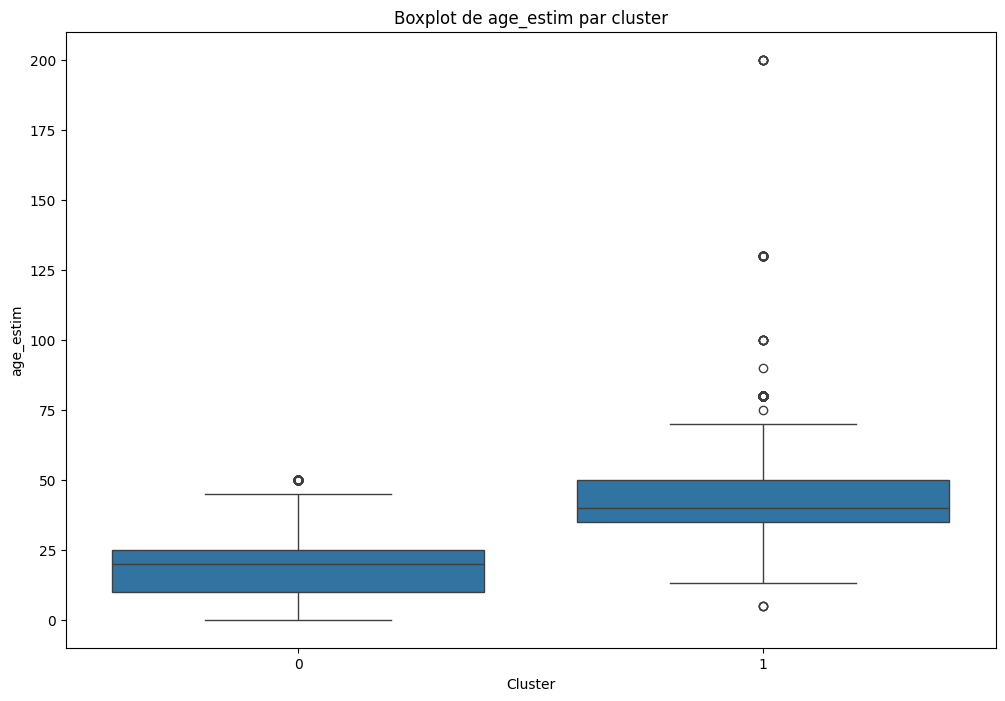

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def apply_clustering(data, n_clusters):
    features = ['haut_tot', 'tronc_diam', 'haut_tronc', 'age_estim', 'fk_stadedev_encoded']
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data['cluster'] = kmeans.fit_predict(data[features])
    return data

def encode_categorical(data, column):
    label_encoder = LabelEncoder()
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])
    return data, label_encoder

def visualize_tree_clusters(file_path, n_clusters):
    data = pd.read_csv(file_path, sep=",")
    
    # Filtrer les données pour ne conserver que les états "EN PLACE" et "REMPLACE"
    data = data[data['fk_arb_etat'].isin(['EN PLACE', 'REMPLACE'])]
    
    # Sélectionner les colonnes pertinentes
    features = ['latitude', 'longitude', 'haut_tot', 'tronc_diam', 'haut_tronc', 'fk_stadedev', 'age_estim']
    data = data[features]
    
    # Supprimer les lignes avec des valeurs manquantes
    data.dropna(inplace=True)
    
    # Encodage de fk_stadedev
    data, label_encoder = encode_categorical(data, 'fk_stadedev')
    
    # Normaliser les données numériques
    scaler = StandardScaler()
    numeric_features = ['haut_tot', 'tronc_diam', 'haut_tronc', 'age_estim']
    data[numeric_features] = scaler.fit_transform(data[numeric_features])
    
    # Appliquer le clustering
    data = apply_clustering(data, n_clusters)
    
    # Évaluer les clusters
    score = silhouette_score(data[numeric_features], data['cluster'])
    print(f'Silhouette Score: {score}')
    
    # S'assurer que les tailles sont positives pour le plotly
    data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives
    
    # Créer la carte interactive avec plotly
    fig = px.scatter_mapbox(data, 
                            lat='latitude', 
                            lon='longitude', 
                            color='cluster', 
                            size='size',
                            color_continuous_scale=px.colors.sequential.Plasma, 
                            size_max=15, 
                            zoom=10,
                            mapbox_style="open-street-map")
    
    fig.show()
    return data, scaler

def plot_boxplots(data, scaler):
    plt.figure(figsize=(12, 8))
    
    # Inverser la normalisation pour le boxplot
    data[['haut_tot', 'tronc_diam', 'haut_tronc', 'age_estim']] = scaler.inverse_transform(data[['haut_tot', 'tronc_diam', 'haut_tronc', 'age_estim']])
    
    sns.boxplot(x='cluster', y='haut_tot', data=data)
    plt.title('Boxplot des hauteurs totales par cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Hauteur Totale (non normalisée)')
    plt.show()
    
    # Vous pouvez également ajouter des boxplots pour les autres caractéristiques si nécessaire
    for feature in ['tronc_diam', 'haut_tronc', 'age_estim']:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='cluster', y=feature, data=data)
        plt.title(f'Boxplot de {feature} par cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

def main():
    # Demander à l'utilisateur le nombre de clusters
    n_clusters = int(input("Entrez le nombre de clusters : "))
    
    file_path = "Données/Data_Arbre.csv"
    
    # Visualiser les clusters d'arbres
    data, scaler = visualize_tree_clusters(file_path, n_clusters)

    # Visualiser le boxplot
    plot_boxplots(data, scaler)

if __name__ == "__main__":
    main()


### Sans haut_tronc

Silhouette Score: 0.4200016426575479


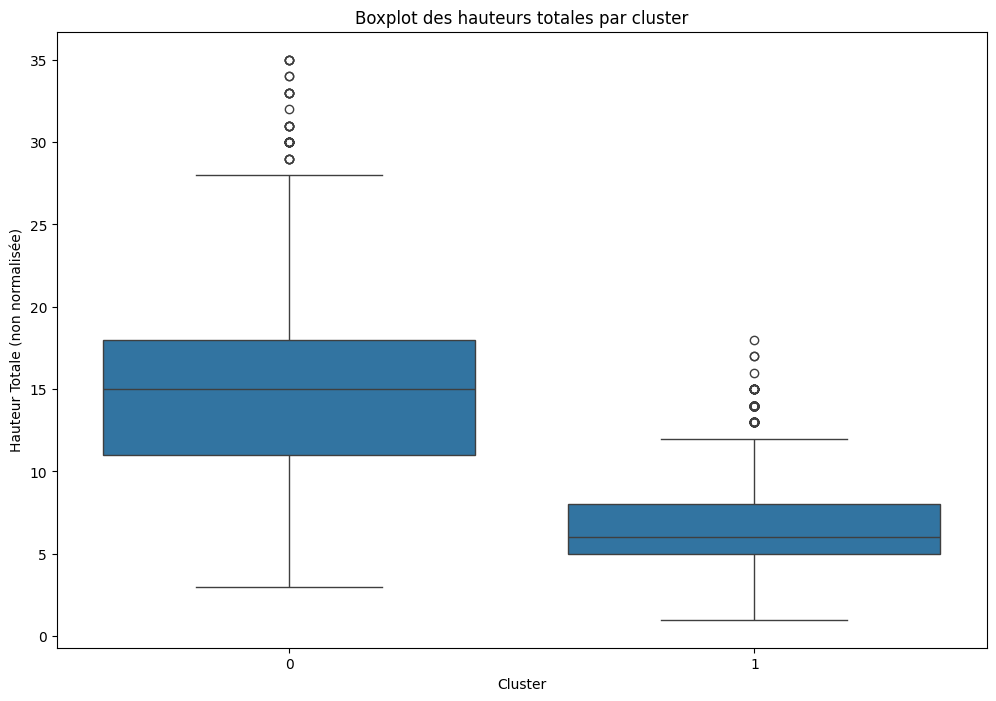

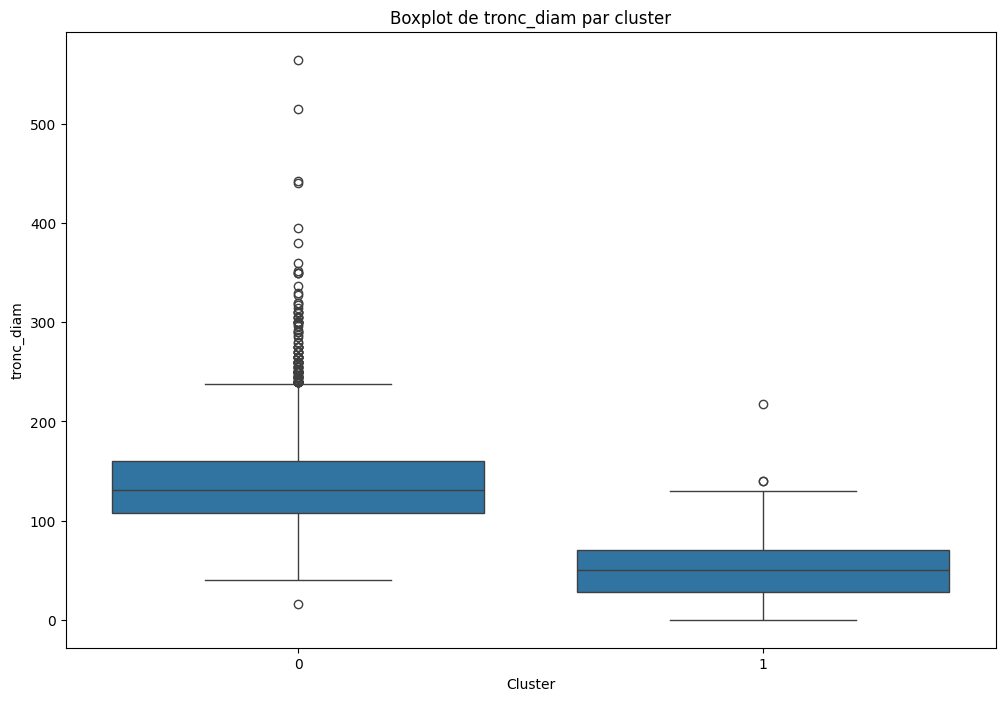

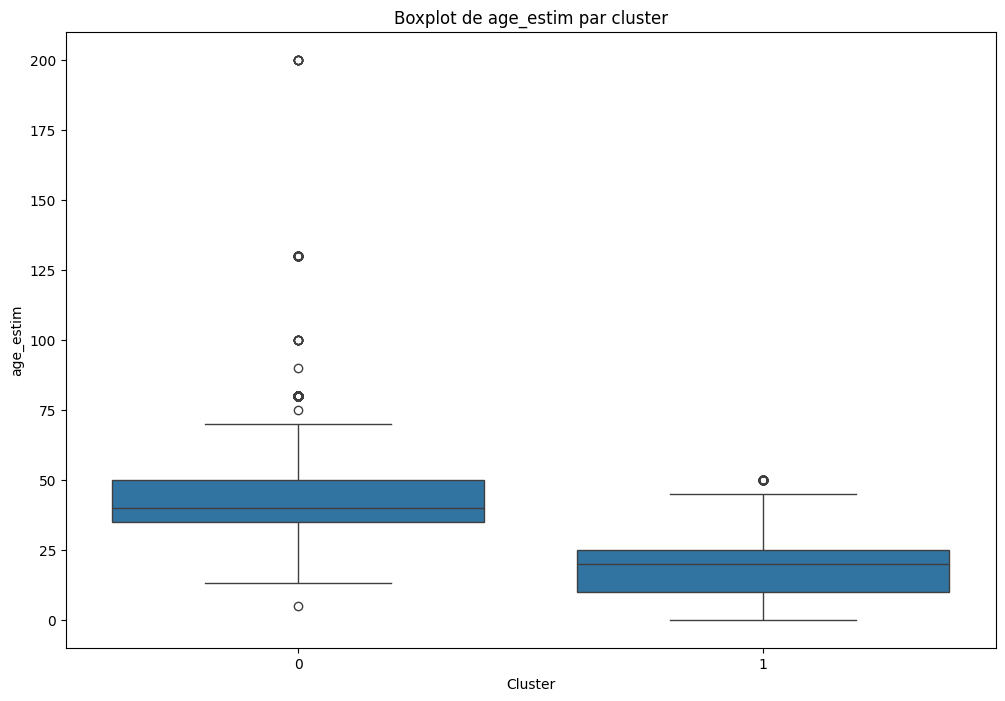

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def apply_clustering(data, n_clusters):
    features = ['haut_tot', 'tronc_diam', 'age_estim', 'fk_stadedev_encoded']
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data['cluster'] = kmeans.fit_predict(data[features])
    return data

def encode_categorical(data, column):
    label_encoder = LabelEncoder()
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])
    return data, label_encoder

def visualize_tree_clusters(file_path, n_clusters):
    data = pd.read_csv(file_path, sep=",")

    # Filtrer les données pour ne conserver que les états "EN PLACE" et "REMPLACE"
    data = data[data['fk_arb_etat'].isin(['EN PLACE', 'REMPLACE'])]

    # Sélectionner les colonnes pertinentes
    features = ['latitude', 'longitude', 'haut_tot', 'tronc_diam', 'fk_stadedev', 'age_estim']
    data = data[features]

    # Supprimer les lignes avec des valeurs manquantes
    data.dropna(inplace=True)

    # Encodage de fk_stadedev
    data, label_encoder = encode_categorical(data, 'fk_stadedev')

    # Normaliser les données numériques
    scaler = StandardScaler()
    numeric_features = ['haut_tot', 'tronc_diam', 'age_estim']
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    # Appliquer le clustering
    data = apply_clustering(data, n_clusters)

    # Évaluer les clusters
    score = silhouette_score(data[numeric_features], data['cluster'])
    print(f'Silhouette Score: {score}')

    # S'assurer que les tailles sont positives pour le plotly
    data['size'] = data['haut_tot'] - data['haut_tot'].min() + 1  # Décalage pour avoir des tailles positives

    # Créer la carte interactive avec plotly
    fig = px.scatter_mapbox(data,
                            lat='latitude',
                            lon='longitude',
                            color='cluster',
                            size='size',
                            color_continuous_scale=px.colors.sequential.Plasma,
                            size_max=15,
                            zoom=10,
                            mapbox_style="open-street-map")

    fig.show()
    return data, scaler

def plot_boxplots(data, scaler):
    plt.figure(figsize=(12, 8))

    # Inverser la normalisation pour le boxplot
    data[['haut_tot', 'tronc_diam', 'age_estim']] = scaler.inverse_transform(data[['haut_tot', 'tronc_diam', 'age_estim']])

    sns.boxplot(x='cluster', y='haut_tot', data=data)
    plt.title('Boxplot des hauteurs totales par cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Hauteur Totale (non normalisée)')
    plt.show()

    #boxplots pour les autres caractéristiques
    for feature in ['tronc_diam', 'age_estim']:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='cluster', y=feature, data=data)
        plt.title(f'Boxplot de {feature} par cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()

def main():
    # Demander à l'utilisateur le nombre de clusters
    n_clusters = int(input("Entrez le nombre de clusters : "))

    file_path = "Données/Data_Arbre.csv"

    # Visualiser les clusters d'arbres
    data, scaler = visualize_tree_clusters(file_path, n_clusters)

    # Visualiser le boxplot
    plot_boxplots(data, scaler)

if __name__ == "__main__":
    main()
